In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
link = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv'
df = pd.read_csv(link)

In [4]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
df.shape

(31647, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
cate_vars = df.select_dtypes(include=['object']).columns.tolist()
cate_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

'Subscribed' is the target variable.

EDA

In [9]:
df['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

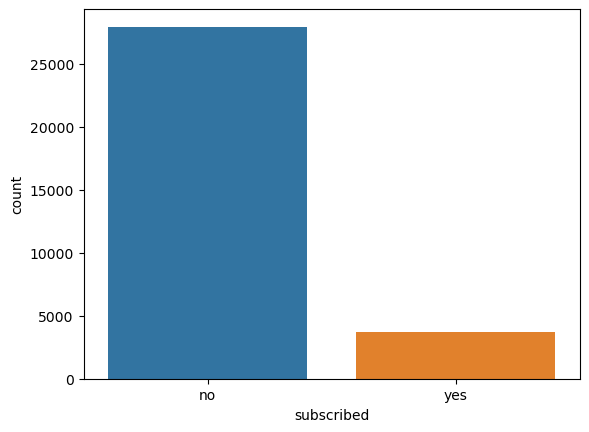

In [10]:
sns.countplot(x = 'subscribed', data = df)

We can see that the data is highly imbalanced. Let us see the variation of each variable.

Univariate Analysis

In [11]:
cate_vars.remove('subscribed')

In [12]:
print(cate_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


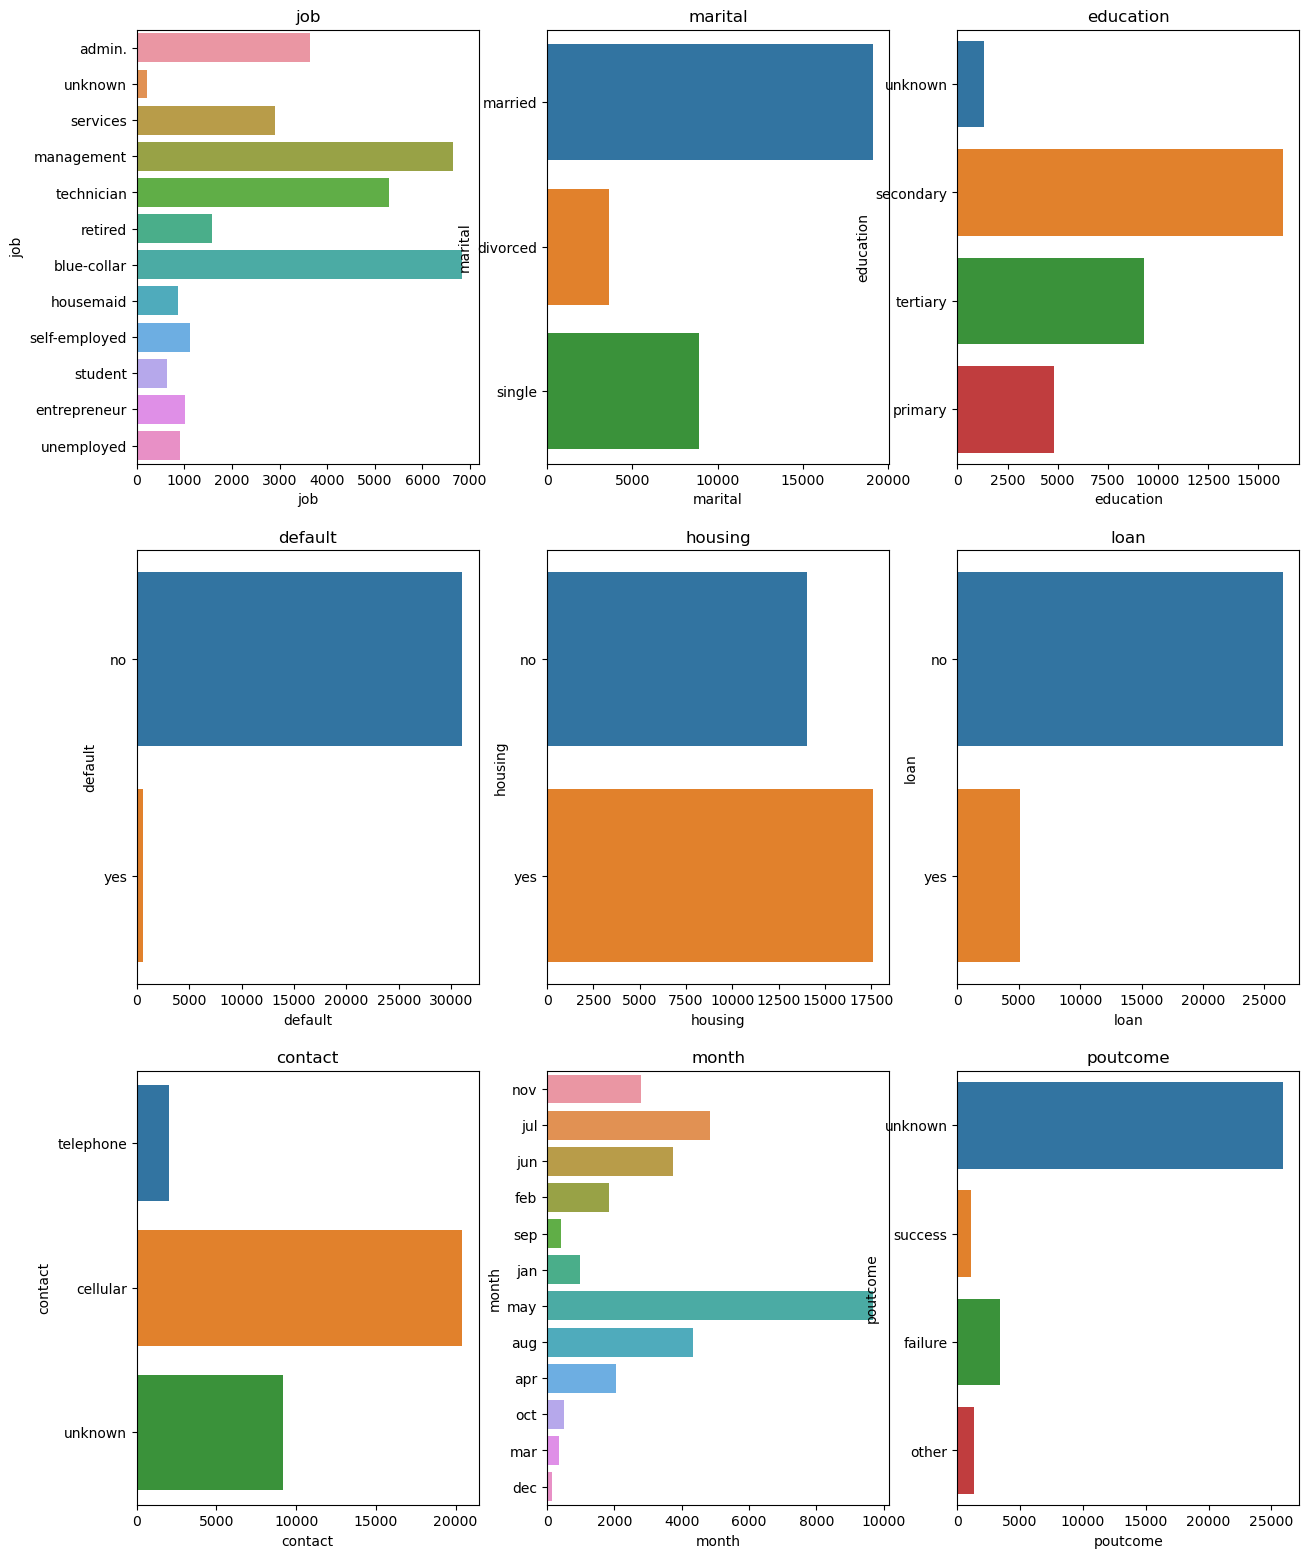

In [13]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cate_var in cate_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cate_var,data=df)
    plt.xlabel(cate_var)
    plt.title(cate_var)
    plotnumber+=1
plt.show()

Bivariate Aanalysis: checking the variation of each variable with target variable

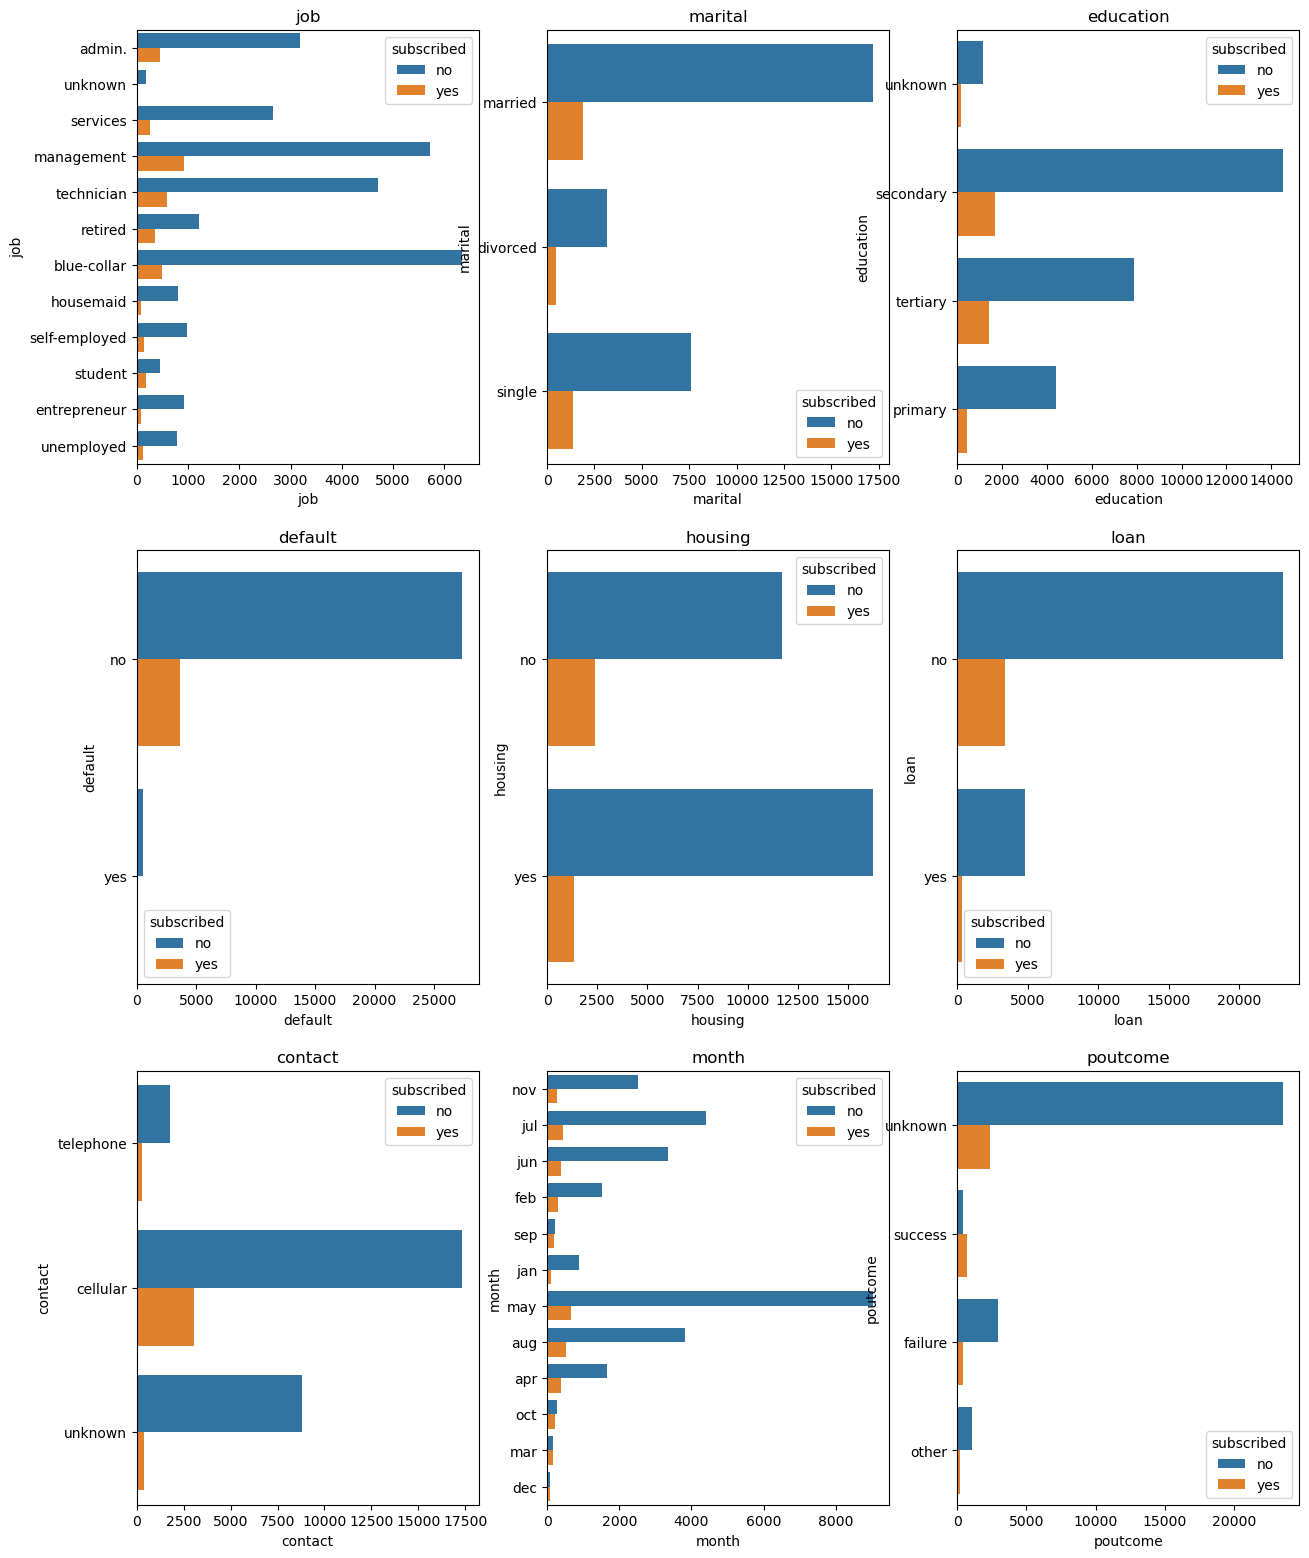

In [14]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cate_var in cate_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cate_var,data=df, hue = 'subscribed')
    plt.xlabel(cate_var)
    plt.title(cate_var)
    plotnumber+=1
plt.show()

In [15]:
for cate_var in cate_vars:
    print(pd.crosstab(df[cate_var], df['subscribed']))
    print('\n')

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


subscribed     no   yes
marital                
divorced     3185   445
married     17176  1919
single       7571  1351


subscribed     no   yes
education              
primary      4381   427
secondary   14527  1697
tertiary     7886  1415
unknown      1138   176


subscribed     no   yes
default                
no          27388  3674
yes           544    41


subscribed     no   yes
housing                
no          11698  2365
yes         16234  1350


subscribed     no   yes
loan                   
no          23132  3384
yes          4800   331


subscribed     no   yes
contact                
cellular    17352  3071
telephone    1

In [16]:
for cate_var in cate_vars:
    print(pd.crosstab(df[cate_var], df['subscribed']).div(pd.crosstab(df[cate_var], df['subscribed']).sum(1).astype(float), axis=0))
    print('\n')

subscribed           no       yes
job                              
admin.         0.875516  0.124484
blue-collar    0.928530  0.071470
entrepreneur   0.915675  0.084325
housemaid      0.909611  0.090389
management     0.860973  0.139027
retired        0.770013  0.229987
self-employed  0.875334  0.124666
services       0.912504  0.087496
student        0.713386  0.286614
technician     0.888072  0.111928
unemployed     0.857459  0.142541
unknown        0.873786  0.126214


subscribed        no       yes
marital                       
divorced    0.877410  0.122590
married     0.899502  0.100498
single      0.848577  0.151423


subscribed        no       yes
education                     
primary     0.911190  0.088810
secondary   0.895402  0.104598
tertiary    0.847866  0.152134
unknown     0.866058  0.133942


subscribed        no       yes
default                       
no          0.881720  0.118280
yes         0.929915  0.070085


subscribed        no       yes
housing             

Numerical variables

In [17]:
num_vars = df.select_dtypes(include = ['int64']).columns.tolist()      #only including int as no float datatype in the df
print(num_vars)

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [18]:
#we can remove ID as it really doesn't affect the dataset
num_vars.remove('ID')
print(num_vars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


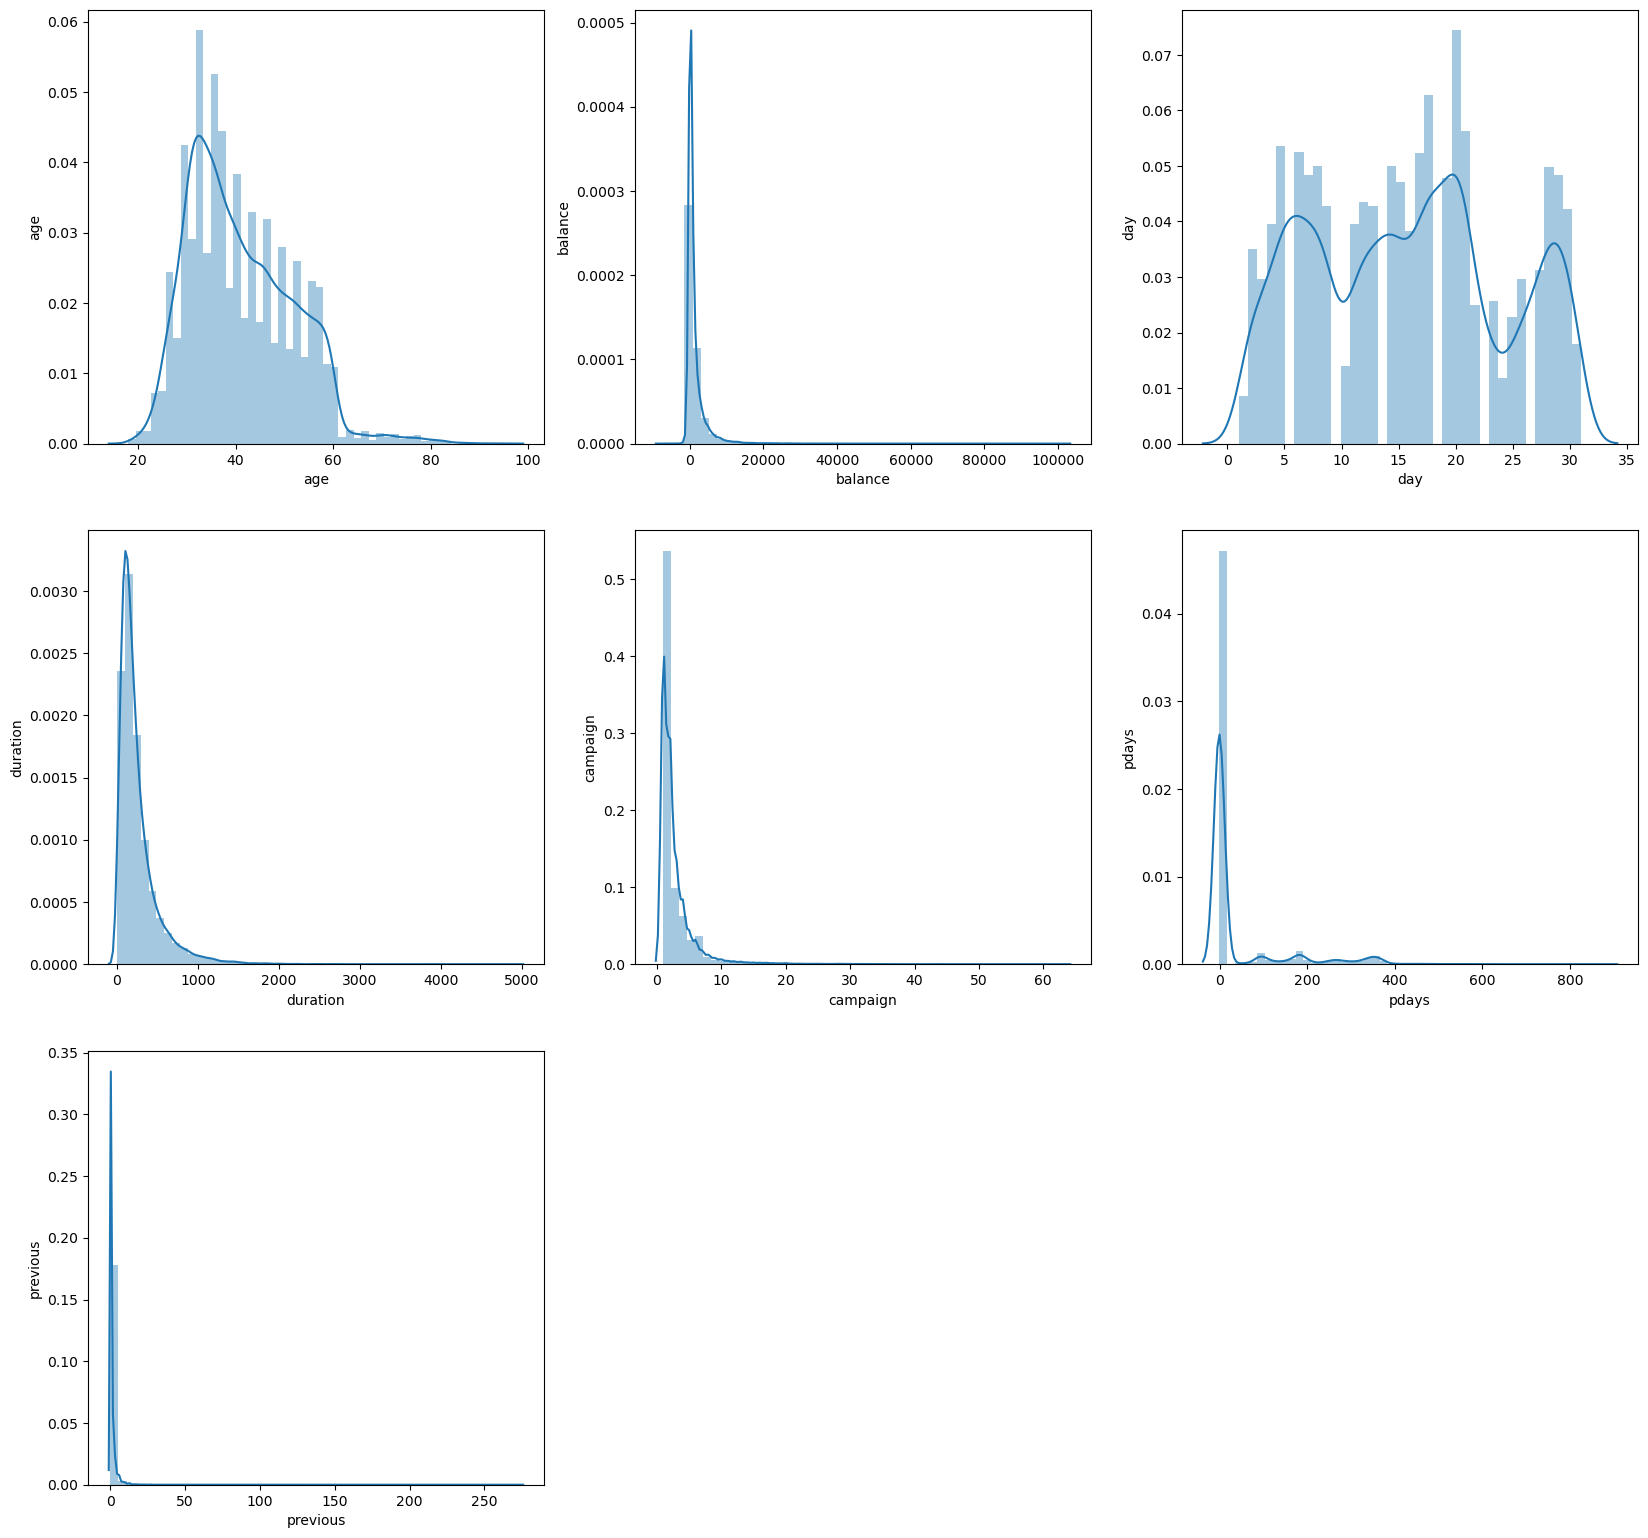

In [19]:
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for num_var in num_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_var])
    plt.ylabel(num_var)
    plotnumber+=1
plt.show()

most of the variables seem to have a lot of outliers

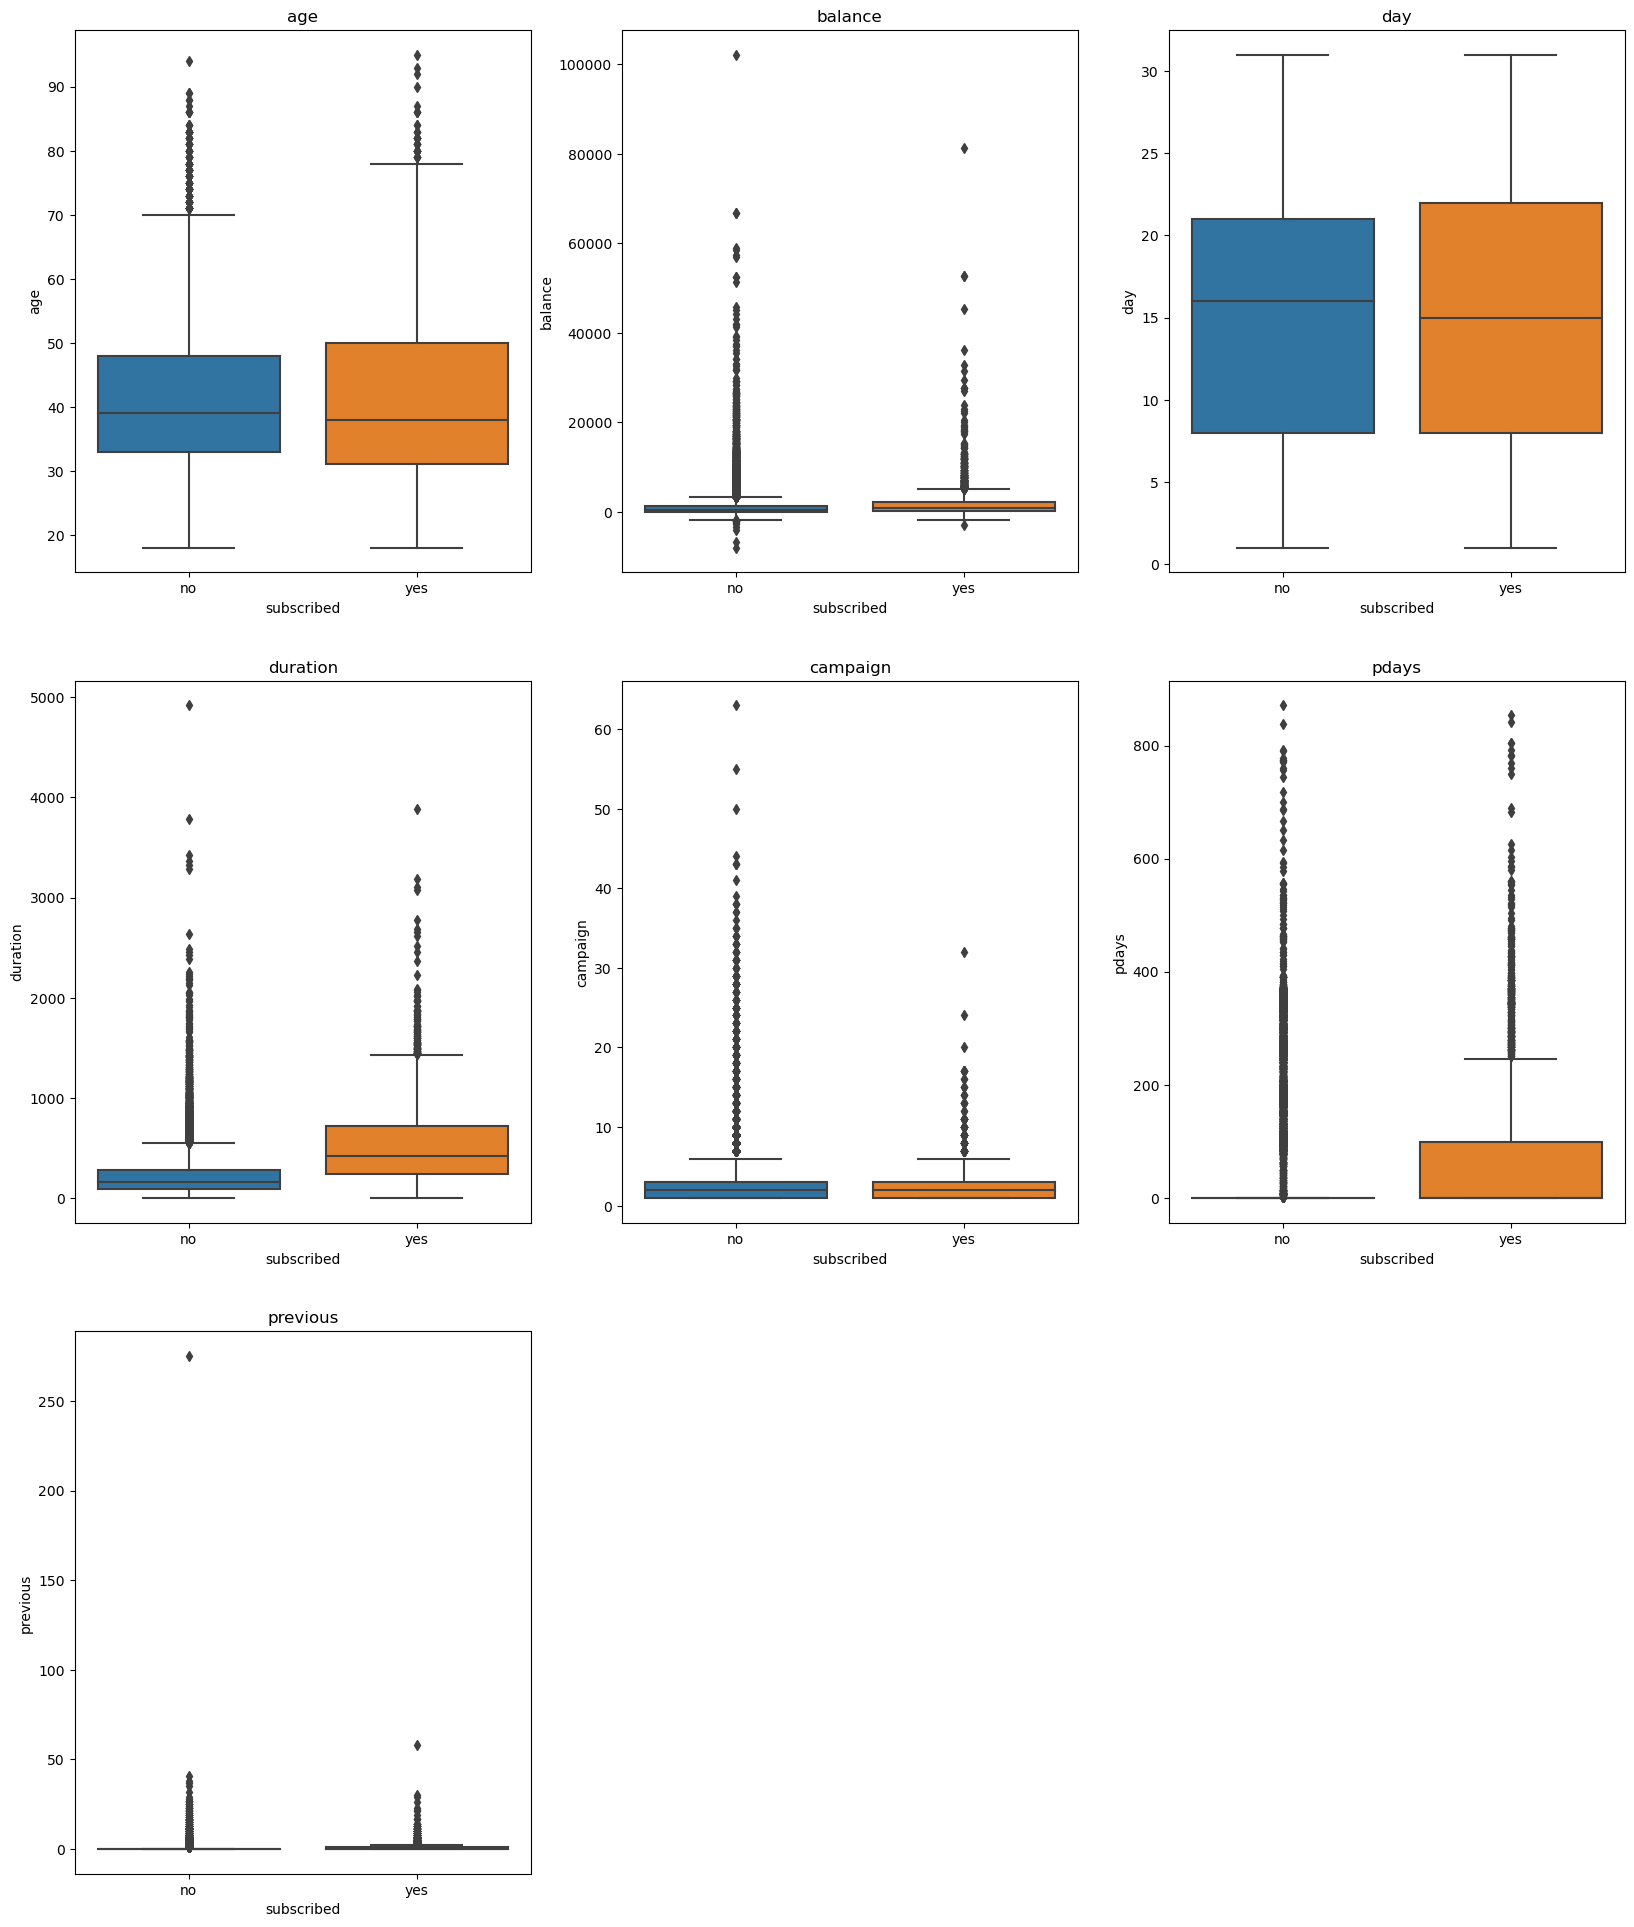

In [20]:
plt.figure(figsize=(20,100), facecolor='white')
plotnumber =1
for num_var in num_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x = 'subscribed', y = num_var, data = df)           #can also write sns.boxplot(df[numerical_feature])
    plt.xlabel('subscribed')
    plt.title(num_var)
    plotnumber+=1
plt.show()

seems that: day, campaign, and previous variables do not have much significance on the subscribed variable <br> removing the outliers <br> No null values

In [21]:
#making another dataframe after removing the categorical variables
df1 = df.drop(columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'ID'])

In [22]:
df1.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed
0,56,1933,19,44,2,-1,0,no
1,31,3,20,91,2,-1,0,no
2,27,891,18,240,1,-1,0,no
3,57,3287,22,867,1,84,3,yes
4,31,119,4,380,1,-1,0,no


In [23]:
#pdays cannot be negative, hence removing the negative values
df1 = df1[df1['pdays'] >= 0]

In [24]:
df1.head()

,age,balance,day,duration,campaign,pdays,previous,subscribed
3,57,3287,22,867,1,84,3,yes
28,45,858,5,617,4,251,2,no
31,39,0,6,13,8,9,2,no
36,63,3738,9,301,1,456,4,no
41,68,2301,14,90,3,120,1,no


In [25]:
#converting the subscribed variable into 0 and 1
df1['subscribed'].replace('no', 0,inplace=True)
df1['subscribed'].replace('yes', 1,inplace=True)

<Axes: >

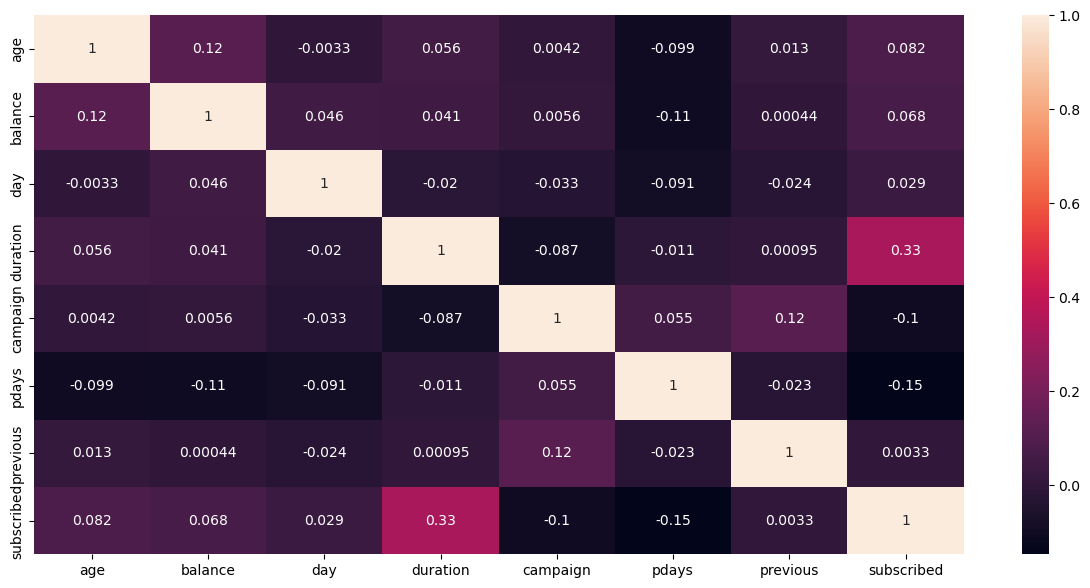

In [26]:
cor = df1.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True)

Only the duration variable is showing some positive correlation with the Subscribed variable. <br> ML Model

In [27]:
#converting the subscribed variable into 0 and 1
df['subscribed'].replace('no', 0,inplace=True)
df['subscribed'].replace('yes', 1,inplace=True)

In [28]:
#pdays cannot be negative, hence removing the negative values
df = df[df['pdays'] >= 0]

In [29]:
result = df['subscribed']
df = df.drop(columns = ['subscribed'])

In [30]:
result.shape

(5723,)

In [31]:
df.shape

(5723, 17)

In [32]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
28,30448,45,technician,married,secondary,no,858,no,no,cellular,5,feb,617,4,251,2,failure
31,30574,39,management,single,tertiary,no,0,yes,no,cellular,6,feb,13,8,9,2,other
36,45155,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure
41,41042,68,retired,married,primary,no,2301,no,no,cellular,14,aug,90,3,120,1,failure


In [33]:
#converting categorical variables into numerical variables
df = pd.get_dummies(df, dtype = int)
df.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
28,30448,45,858,5,617,4,251,2,0,0,...,0,0,0,0,0,0,1,0,0,0
31,30574,39,0,6,13,8,9,2,0,0,...,0,0,0,0,0,0,0,1,0,0
36,45155,63,3738,9,301,1,456,4,0,0,...,0,0,0,1,0,0,1,0,0,0
41,41042,68,2301,14,90,3,120,1,0,0,...,0,0,0,0,0,0,1,0,0,0


Splitting the data into training and testing data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_val, y_train, y_val = train_test_split(df, result, test_size=0.2, random_state=0)

Models

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
#creating an object of Decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=0)

In [40]:
#fitting the model
dt.fit(X_train, y_train)
DecisionTreeClassifier(max_depth=4, random_state=0)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [41]:
#making predictions on the validation set
predict = dt.predict(X_val)
predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

In [42]:
#Calculating the accuracy
accuracy_score(y_val,predict)

0.8655021834061135

In [44]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,dt.predict(X_val))
cm

array([[811,  46],
       [108, 180]], dtype=int64)

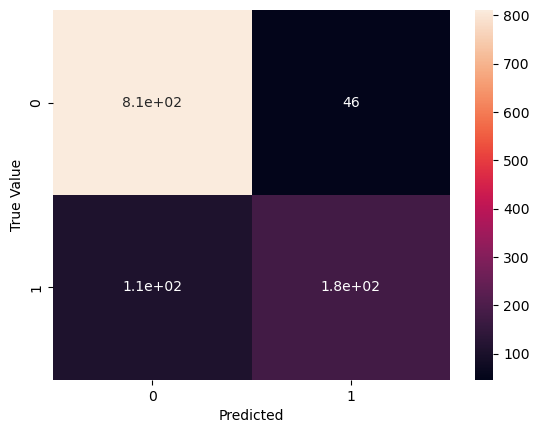

In [46]:
#plot the graph
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [48]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 393.8 kB/s eta 0:04:14
   ---------------------------------------- 0.1/99.8 MB 416.7 kB/s eta 0:04:00
   ---------------------------------------- 0.1/99.8 MB 547.6 kB/s eta 0:03:02
   ---------------------------------------- 0.2/99.8 MB 579.6 kB/s eta 0:02:52
   ---------------------------------------- 0.2/99.8 MB 692.4 kB/s eta 0:02:24
   ---------------------------------------- 0.2/99.8 MB 692.4 kB/s eta 0:02:24
   -----------------------------

In [49]:
from xgboost import XGBClassifier

In [52]:
xgb_mod = XGBClassifier(objective="binary:logistic", random_state=42)

In [53]:
xgb_mod.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [54]:
pred = xgb_mod.predict(X_val)
pred

array([0, 1, 0, ..., 1, 0, 0])

In [55]:
accuracy_score(y_val,pred)

0.8576419213973799

Prediction on test set

In [57]:
link2 = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv'
df2 = pd.read_csv(link2)

In [58]:
df2.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [59]:
df2 = pd.get_dummies(df2, dtype = int)
df2.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [60]:
test_pred = dt.predict(df2)
test_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

Putting these into a csv file

In [61]:
test = pd.DataFrame()

In [62]:
test['ID'] = df2['ID']
test['subscribed'] = test_pred

In [63]:
test['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
13559    0
13560    0
13561    0
13562    1
13563    0
Name: subscribed, Length: 13564, dtype: int64

In [64]:
#converting 0 and 1 into categorical variable
test['subscribed'].replace(0,'no',inplace=True)
test['subscribed'].replace(1,'yes',inplace=True)

In [65]:
test['subscribed']

0         no
1         no
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [67]:
test.to_csv('test_file.csv', header=True, index=False)

In [68]:
df3 = pd.read_csv('test_file.csv')
print(df3)

          ID subscribed
0      38441         no
1      40403         no
2       3709         no
3      37422         no
4      12527         no
...      ...        ...
13559  23465         no
13560  11743         no
13561  28292         no
13562  45163        yes
13563  34839         no

[13564 rows x 2 columns]


In [69]:
df2['Subscribed'] = test['subscribed']

In [70]:
df2.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Subscribed
0,38441,32,118,15,20,6,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,no
2,3709,31,144,16,676,1,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,no
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,1,0,0,0,0,0,0,1,no
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,1,no
